# Assignment Instructions:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly. 
2. Perform a similar anlaysis as done in the reference notebook on this dataset.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files

upload = files.upload()

Saving haberman.csv to haberman (1).csv


In [3]:
import io 
import pandas as pd

#since we have given our own column names
#the 0th index row becomes the already provided header in the csv file i.e. [age, year, nodes, status]
#in order to skip that we use skiprows parameter and add the index number we need to skip which is 0
df = pd.read_csv(io.BytesIO(upload['haberman.csv']), names = ["age","operation_Year","axil_nodes","survival_status"], skiprows=[0]) 
df.head()

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
- You have to write all of your observations in Markdown cell with proper formatting.You can go through the following blog to understand formatting in markdown cells - https://www.markdownguide.org/basic-syntax/
- Do not write your observations as comments in code cells.
- Write comments in your code cells in order to explain the code that you are writing. Proper use of commenting can make code maintenance much easier, as well as helping make finding bugs faster. 
- You can add extra cells using <b>Insert cell below command</b> in Insert tab. You can also use the shortcut Alt+Enter
- It is a good programming practise to define all the libraries that you would be using in a single cell

In [4]:
print(f'Rows = {df.shape[0]}, Columns = {df.shape[1]}')

Rows = 306, Columns = 4


We have 306 points and 4 features(including survival_status - target feature)

Next, we check number of classes and their value count in our target feature

In [5]:
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

225 patients survived for 5 years or longer from the year of operation.

81 patients died within 5 years of from year of operation.

Inference: 
>Dataset is imbalanced.

Next we check the dtypes of our features and change our class '2' to 'no' and '1' to 'yes' for simplicity and change the dtype of operation_Year to category if it's not so.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              306 non-null    int64
 1   operation_Year   306 non-null    int64
 2   axil_nodes       306 non-null    int64
 3   survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [7]:
df = df.astype({'operation_Year': 'category'})

In [8]:
df['survival_status'].replace({1: 'Yes', 2: 'No'}, inplace=True)
df.head(10)

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes
5,33,58,10,Yes
6,33,60,0,Yes
7,34,59,0,No
8,34,66,9,No
9,34,58,30,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              306 non-null    int64   
 1   operation_Year   306 non-null    category
 2   axil_nodes       306 non-null    int64   
 3   survival_status  306 non-null    object  
dtypes: category(1), int64(2), object(1)
memory usage: 8.0+ KB


In [10]:
df.describe(include='all')

,age,operation_Year,axil_nodes,survival_status
count,306.000000,306.0,306.000000,306
unique,NaN,12.0,NaN,2
top,NaN,58.0,NaN,Yes
freq,NaN,36.0,NaN,225
mean,52.457516,NaN,4.026144,NaN
std,10.803452,NaN,7.189654,NaN
min,30.000000,NaN,0.000000,NaN
25%,44.000000,NaN,0.000000,NaN
50%,52.000000,NaN,1.000000,NaN
75%,60.750000,NaN,4.000000,NaN


Let's check for skewness of our features:

In [11]:
#refer on how to understand skewness metric - https://community.gooddata.com/metrics-and-maql-kb-articles-43/normality-testing-skewness-and-kurtosis-241
df.skew()

age           0.146505
axil_nodes    2.983823
dtype: float64

Inference:

*Predictor Variables*

> **Age** data shows signs of symmetric distribution can probably be normal distribution - Mean and Median are equal, Skewness metric is close to 0. We'll look at PDF in next section to back our intial observations.

> **Axil Nodes** data points at highly skewed distribution - Mean and Median are not equal, skewness metric greater than 1 indicating right skewed distribution.Huge difference between 75th percentile value (4) and max value (53) indicates at outliers. We'll look at plots in next section to back our initial observations.

> **Operation Year** data indicates that the records are from years 1958-69. We'll treat this feature as categorical.

*Target Variable*

> **Survival Status** data shows 225 patients survived 5 years or longer whereas 81 patients couldn't survive, the dataset is imbalanced

Let's have a look at high level stats of both classes separately and skewness of their features:

In [12]:
df[['age', 'axil_nodes', 'survival_status']].groupby('survival_status').describe()

age                                                      \
                 count       mean        std   min   25%   50%   75%   max   
survival_status                                                              
No                81.0  53.679012  10.167137  34.0  46.0  53.0  61.0  83.0   
Yes              225.0  52.017778  11.012154  30.0  43.0  52.0  60.0  77.0   

                axil_nodes                                                 
                     count      mean       std  min  25%  50%   75%   max  
survival_status                                                            
No                    81.0  7.456790  9.185654  0.0  1.0  4.0  11.0  52.0  
Yes                  225.0  2.791111  5.870318  0.0  0.0  0.0   3.0  46.0

In [13]:
df[['age', 'axil_nodes', 'survival_status']].groupby('survival_status').skew()

,age,axil_nodes
survival_status,,
No,0.493619,2.099564
Yes,0.070493,3.681090


Inference:
> **Age** data of patients who **couldn't survive** indicates approximately symmetric distribution - Mean and Median are nearly equal, Skewness is within 0-0.5.

> **Age** data of patients that **survived** indicate a symmetric distribution as well - Mean and Median are equal, Skewness is close to 0.

> **Axil Nodes** data of patients that **couldn't survive** point at a highly skewed distribution indicating presence of outliers. 50% (~40) patients had nodes <= 4 while the max nodes value is 52 indicating outliers owing to the huge difference between median and max value.

> **Axil Nodes** data of patients that **survived** point at a highly skewed distribution as well indicating presence of outliers. 50% (~112) patients had 0 nodes while the max nodes value is 46 indicating outliers owing to the huge difference between median and max value.

In [14]:
from statsmodels import robust

print ("\nMedian Absolute Deviation")
print('Age: ', robust.mad(df["age"]))
print('Nodes: ',robust.mad(df["axil_nodes"]))


Median Absolute Deviation
Age:  11.860817748044816
Nodes:  1.482602218505602


MAD depicts the median distance value of how far each value is from the median of a variable.

**Feature Correlation**

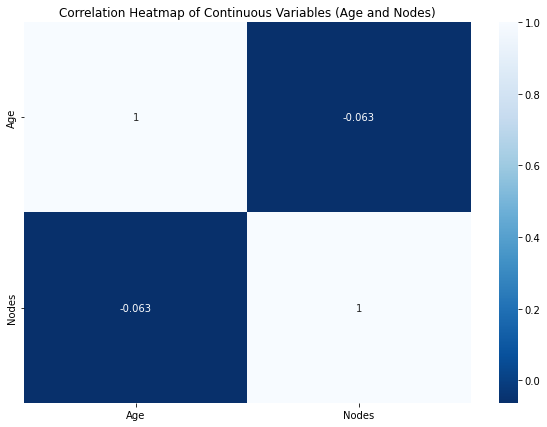

In [15]:
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.heatmap(df.corr(), annot=True, cmap = 'Blues_r')
ax.set_xticklabels(labels = ['Age', 'Nodes'])
ax.set_yticklabels(labels = ['Age', 'Nodes'])
ax.set_title('Correlation Heatmap of Continuous Variables (Age and Nodes)')
plt.show()

Observation:

> Indicates weak negative correlation between age and axil_nodes.

**Outlier Detection**

In [16]:
def IQR(df, feature):
    quartiles = np.percentile(df[feature], (25,75))
    return quartiles, (quartiles[1] - quartiles[0])

def upper_lower_lim(df, feature):
    lower = IQR(df, feature)[0][0] - (1.5*IQR(df, feature)[1])
    upper = IQR(df, feature)[0][1] + (1.5*IQR(df, feature)[1])
    return lower, upper

In [17]:
print('Age:')
print(IQR(df, 'age'),
upper_lower_lim(df,'age'))
print('\nAxil Nodes: ')
print(IQR(df, 'axil_nodes'),
upper_lower_lim(df,'axil_nodes'))

Age:
(array([44.  , 60.75]), 16.75) (18.875, 85.875)

Axil Nodes: 
(array([0., 4.]), 4.0) (-6.0, 10.0)


In [18]:
print('Outliers in Age: ', len(df.loc[(df['age']<18.875) | (df['age']>85.875)]))
print('Outliers in Axil Nodes: ',len(df.loc[(df['axil_nodes']<-6) | (df['axil_nodes']>10)]))

Outliers in Age:  0
Outliers in Axil Nodes:  40


There are multiple ways of handling these outliers, 

please refer - https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/

Since our dataset is small, we can't afford to remove outlier points instead we can use quantile based flooring and capping for these points.

### 1.2 - Explain the objective of the problem.
(The objective for a problem can be defined as a brief explanation of problem that you are trying to solve using the given dataset)

The objective is to use EDA on the independent features to understand their distribution w.r.t target feature to define general conditions that can distinguish between a patient who survived and who didn't.

### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

**Target Feature**

**Survival Status**

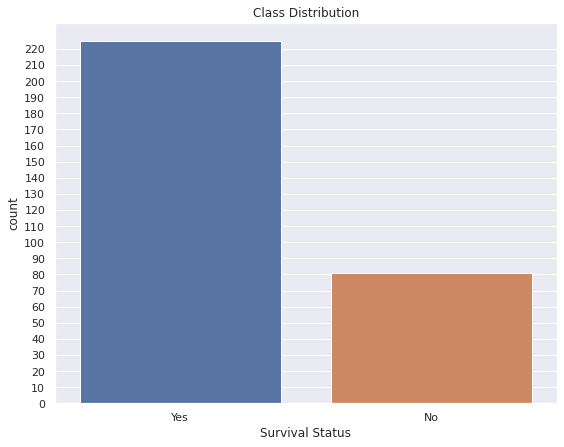

In [19]:
#using seaborn
sns.set_theme(style = 'darkgrid')
fig, ax = plt.subplots(figsize=(9,7))
ax = sns.countplot(data = df, x = 'survival_status', ax=ax)
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(230,step=10))
ax.set_xlabel('Survival Status')
ax.set_title('Class Distribution')
plt.show()

**Observations**
> If a patient's record is randomly selected from the dataset, the probability that the patient survived is 73.5% (225/306). Similarly, the probability that the patient did not survive is 26.5% (81/306). 


**Predictor Features**

**Age**

In [20]:
age_hist = np.histogram(df['age'], bins=10)
age_hist

(array([16, 27, 46, 53, 55, 41, 41, 18,  7,  2]),
 array([30. , 35.3, 40.6, 45.9, 51.2, 56.5, 61.8, 67.1, 72.4, 77.7, 83. ]))

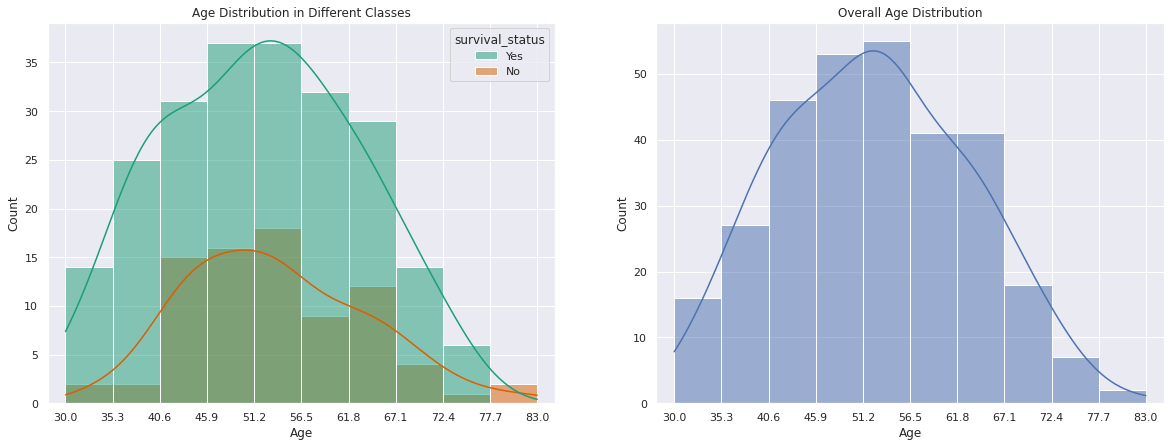

In [21]:
sns.set_theme(style='darkgrid')

fig, ax = plt.subplots(nrows=1,ncols=2, figsize = (20,7))


sns.histplot(data=df, x='age',bins=age_hist[1], kde=True, hue='survival_status', palette = 'Dark2', legend=True, ax = ax[0])
ax[0].set_xlim([28,85])
ax[0].set_xticks(age_hist[1])
ax[0].set_xlabel('Age')
ax[0].set_title('Age Distribution in Different Classes')

sns.histplot(data= df, x='age', bins=age_hist[1], kde=True, palette = "Dark2", legend= False, ax = ax[1])
ax[1].set_xlim([28,85])
ax[1].set_xticks(age_hist[1])
ax[1].set_xlabel('Age')
ax[1].set_title("Overall Age Distribution")

plt.show()

In the previous section we made an assumption that our age feature depicts a Normal Distribution based on high level statistics of the age feature. After looking at the plot it doesn't appear to be the case. Still let's test our observation using QQ Plot: 

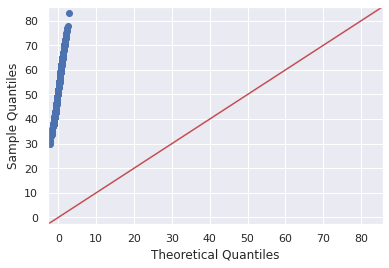

In [22]:
#code referred from - https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93
import statsmodels.api as sm
import pylab

sm.qqplot(df['age'], line='45')
pylab.show()

This shows that our Age feature isn't Normally Distributed and our intial assumption was incorrect.

In [23]:
#this cell is used to run queries based on plot observations to compute statistical information
print(len(df[(df['age']<=40) & (df['survival_status']=='Yes')])
,len(df[(df['age']<=40) & (df['survival_status']=='No')])
,len(df[(df['age']<=40)]))

39 4 43


**Observations:**
>Patient has high chance of survival if the age of patient lies in [30,40].

>14% (=43) of total patients ages lie in [30,40].

>90.6% (=39) of patients whose age lies in [30,40] have survived which is equal to 12.7% of the total patients. These make up for 17.33% of the total survived patients.

Next we look at the survived/died ratio for different age ranges:

In [24]:
#use pd.cut() to create age brackets feature from age feature
age_bins = pd.cut(df['age'], bins=10, precision=0)
age_bins.unique()

[(30.0, 35.0], (35.0, 41.0], (41.0, 46.0], (46.0, 51.0], (51.0, 56.0], (56.0, 62.0], (62.0, 67.0], (67.0, 72.0], (72.0, 78.0], (78.0, 83.0]]
Categories (10, interval[float64, right]): [(30.0, 35.0] < (35.0, 41.0] < (41.0, 46.0] <
                                            (46.0, 51.0] ... (62.0, 67.0] < (67.0, 72.0] <
                                            (72.0, 78.0] < (78.0, 83.0]]

In [25]:
#concat age_bracket to the dataframe
temp_df = pd.concat([df, age_bins], axis=1)
temp_df.columns = list(df.columns)+['age_bracket']
temp_df.head()

,age,operation_Year,axil_nodes,survival_status,age_bracket
0,30,64,1,Yes,"(30.0, 35.0]"
1,30,62,3,Yes,"(30.0, 35.0]"
2,30,65,0,Yes,"(30.0, 35.0]"
3,31,59,2,Yes,"(30.0, 35.0]"
4,31,65,4,Yes,"(30.0, 35.0]"


In [26]:
#Lets have a closer look at the ratio
survived = temp_df[temp_df['survival_status']=="Yes"]
died = temp_df[temp_df['survival_status']=="No"]
survived = survived.groupby(by='age_bracket')['survival_status'].count()
died = died.groupby(by='age_bracket')['survival_status'].count()
temp_ratio_df = pd.concat([survived,died, survived/died], axis=1)
temp_ratio_df.columns = ['survived_count', 'died_count', 'ratio']
print(temp_ratio_df.sort_values(by='ratio'))

              survived_count  died_count      ratio
age_bracket                                        
(78.0, 83.0]               0           2   0.000000
(51.0, 56.0]              37          18   2.055556
(41.0, 46.0]              31          15   2.066667
(46.0, 51.0]              37          16   2.312500
(62.0, 67.0]              29          12   2.416667
(67.0, 72.0]              14           4   3.500000
(56.0, 62.0]              32           9   3.555556
(72.0, 78.0]               6           1   6.000000
(30.0, 35.0]              14           2   7.000000
(35.0, 41.0]              25           2  12.500000


**Inference:**

> Age brackets (35.0,41.0], (30.0,35.0], (72.0,78.0] have the highest survival to death ratio.

> Age brackets (51.0, 56.0], (41.0, 46.0], (46.0,51.0] have the lowest survival to death ratio. 

**Note**: we do not consider the bracket (78.0, 83.0]because of insufficient amount of data points. 

**Axil Nodes**

In [27]:
nodes_hist = np.histogram(df['axil_nodes'], bins =13) #we choose bins=13 because it returns xticks as whole numbers 
nodes_hist

(array([217,  33,  20,  14,   6,   9,   2,   2,   1,   0,   0,   1,   1]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40., 44., 48.,
        52.]))

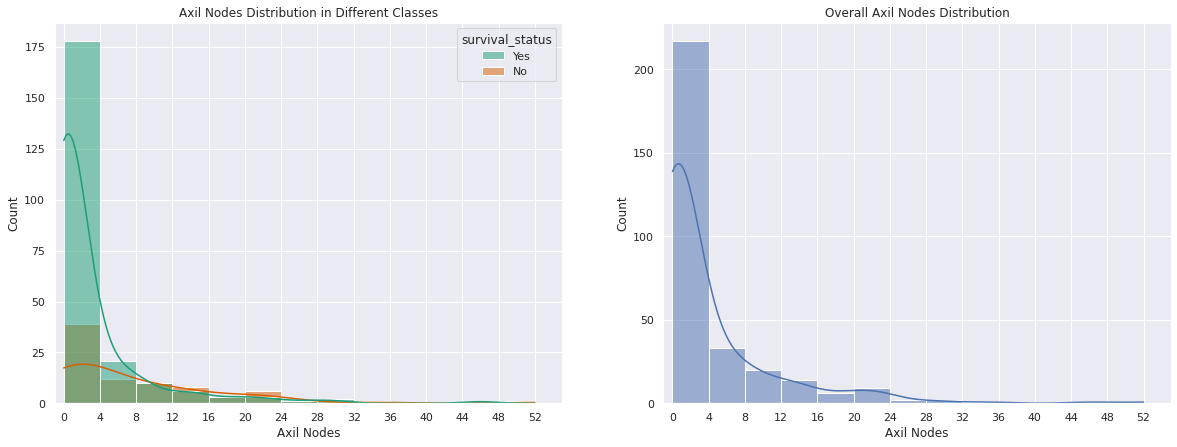

In [28]:
sns.set_theme(style='darkgrid')

fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize = (20,7))

sns.histplot(data=df, x='axil_nodes', bins = nodes_hist[1],hue='survival_status',kde=True, palette = 'Dark2', legend=True, ax = ax[0]) 
ax[0].set_xlabel('Age')
ax[0].set_xlim([-1, 55])
ax[0].set_xticks(nodes_hist[1])
ax[0].set_xlabel('Axil Nodes')
ax[0].set_title('Axil Nodes Distribution in Different Classes')

sns.histplot(data=df, x='axil_nodes', bins = nodes_hist[1], kde=True, palette = 'Dark2', legend=False, ax = ax[1]) 
ax[1].set_xlabel('Age')
ax[1].set_xlim([-1, 55])
ax[1].set_xticks(nodes_hist[1])
ax[1].set_xlabel('Axil Nodes')
ax[1].set_title('Overall Axil Nodes Distribution')

plt.show()

In the previous section we made an assumption that our nodes feature depicts a skewness based on high level statistics of the nodes feature. After looking at the plot it clearly shows that our assumption was correct.

Axil Nodes feature of both, the patients that survived and that didn't depict a heavy right skewed distribution backing our initial inferences of the data.

In [29]:
#this cell is used to run queries based on plot observations to compute statistical information
print(len(df[(df['axil_nodes']<=4) & (df['survival_status']=='Yes')])
,len(df[(df['axil_nodes']<=4) & (df['survival_status']=='No')])
,len(df[(df['axil_nodes']<=4)]))

188 42 230



Observations:
> Patients having nodes less than or equal to 4 have a higher chance of survival.

> 75% (=230) of the total patients have nodes less than or equal to 4. 

> 81.7% (=188) of the patients having nodes less than or equal to 4 have survived which is 61.4% of the total patients. These patients make up for 83.5% of the total survived patients.

Next we look at the survived/died ratio for different ranges of nodes:

In [30]:
#use pd.cut() to create nodes brackets feature from nodes feature
nodes_bins = pd.cut(df['axil_nodes'], bins=13, precision = 0)
nodes_bins.unique()

[(-0.1, 4.0], (8.0, 12.0], (28.0, 32.0], (4.0, 8.0], (12.0, 16.0], ..., (16.0, 20.0], (48.0, 52.0], (44.0, 48.0], (32.0, 36.0], (24.0, 28.0]]
Length: 11
Categories (13, interval[float64, right]): [(-0.1, 4.0] < (4.0, 8.0] < (8.0, 12.0] < (12.0, 16.0] <
                                            ... < (36.0, 40.0] < (40.0, 44.0] <
                                            (44.0, 48.0] < (48.0, 52.0]]

In [31]:
#concat nodes_bracket to the dataframe
temp_df = pd.concat([df, nodes_bins], axis=1)
temp_df.columns = list(df.columns)+['nodes_bracket']
temp_df.head()

,age,operation_Year,axil_nodes,survival_status,nodes_bracket
0,30,64,1,Yes,"(-0.1, 4.0]"
1,30,62,3,Yes,"(-0.1, 4.0]"
2,30,65,0,Yes,"(-0.1, 4.0]"
3,31,59,2,Yes,"(-0.1, 4.0]"
4,31,65,4,Yes,"(-0.1, 4.0]"


In [32]:
#Lets have a closer look at the ratio
survived = temp_df[temp_df['survival_status']=="Yes"]
died = temp_df[temp_df['survival_status']=="No"]
survived = survived.groupby(by='nodes_bracket')['survival_status'].count()
died = died.groupby(by='nodes_bracket')['survival_status'].count()
temp_ratio_df = pd.concat([survived,died, survived/died], axis=1)
temp_ratio_df.columns = ['survived_count', 'died_count', 'ratio']
print(temp_ratio_df.sort_values(by='ratio'))

               survived_count  died_count     ratio
nodes_bracket                                      
(32.0, 36.0]                0           1  0.000000
(48.0, 52.0]                0           1  0.000000
(20.0, 24.0]                2           6  0.333333
(8.0, 12.0]                 6           9  0.666667
(16.0, 20.0]                3           4  0.750000
(12.0, 16.0]                6           7  0.857143
(4.0, 8.0]                 16          11  1.454545
(-0.1, 4.0]               188          42  4.476190
(24.0, 28.0]                2           0       inf
(28.0, 32.0]                1           0       inf
(44.0, 48.0]                1           0       inf
(36.0, 40.0]                0           0       NaN
(40.0, 44.0]                0           0       NaN


Inference: 
> Nodes brackets (-0.1, 4.0], (4.0, 8.0] have the highest survival to death ratio.

**Note**: we do not consider the brackets (24.0, 28.0],(28.0, 32.0],(44.0, 48.0],(36.0, 40.0],(40.0, 44.0] because of insufficient amount of data points.

> Nodes brackets (20.0, 24.0], (8.0, 12.0] have the lowest survival to death ratio. 

**Note**: we do not consider the brackets (32.0, 36.0], (48.0, 52.0] because of insufficient amount of data points. 

**Operation Year**

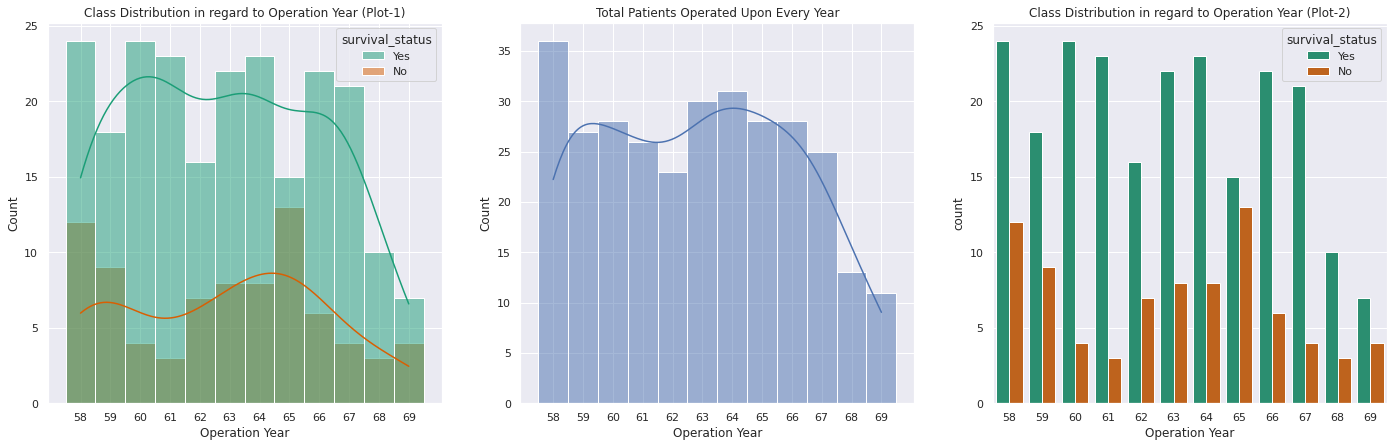

In [33]:
#plot operation years barplot for survived and not for each year
sns.set_theme(style='darkgrid')

fig, ax = plt.subplots(nrows = 1, ncols = 3,figsize = (24,7))

sns.histplot(data=df, x='operation_Year',hue = 'survival_status',kde=True, palette = 'Dark2', legend=True, ax = ax[0])
ax[0].set_xticks(np.arange(58, 70,1))
ax[0].set_xlabel("Operation Year")
ax[0].set_title('Class Distribution in regard to Operation Year (Plot-1)')

sns.histplot(data=df,x='operation_Year',kde=True, palette = 'Dark2', legend=False, ax = ax[1])
ax[1].set_xticks(np.arange(58, 70,1))
ax[1].set_xlabel("Operation Year")
ax[1].set_title('Total Patients Operated Upon Every Year')


sns.countplot(data=df, x='operation_Year',hue = 'survival_status', palette = 'Dark2', ax = ax[2])
ax[2].set_xlabel("Operation Year")
ax[2].set_title('Class Distribution in regard to Operation Year (Plot-2)')

plt.show()

In [34]:
#this cell is used to run queries based on plot observations to compute statistical information
print(len(df.query('operation_Year in [60,61,66,67] & survival_status == "No"')),
len(df.query('operation_Year in [60,61,66,67] & survival_status == "Yes"')))

17 90


**Observations:**
> Patients that were operated upon in the years 1960,1961,1966 and 1967 have higher chance of survival.

> The patients that were operated in the above mentioned years make up for ~35% (=107) of the total patients.

> 84% (=90) of the patients that were operated in these years have survived. These patients make up for 40% of the total survived patients and 29.4% of the total patients.

Next we look at survived/died ratio for each year:

In [35]:
#Lets have a closer look at the ratio
survived = df[df['survival_status']=="Yes"]
died = df[df['survival_status']=="No"]
survived = survived.groupby(by='operation_Year')['survival_status'].count()
died = died.groupby(by='operation_Year')['survival_status'].count()
temp_ratio_df = pd.concat([survived, died, survived/died], axis=1)
temp_ratio_df.columns = ['survived_count', 'died_count', 'ratio']
print(temp_ratio_df.sort_values(by='ratio'))

                survived_count  died_count     ratio
operation_Year                                      
65                          15          13  1.153846
69                           7           4  1.750000
58                          24          12  2.000000
59                          18           9  2.000000
62                          16           7  2.285714
63                          22           8  2.750000
64                          23           8  2.875000
68                          10           3  3.333333
66                          22           6  3.666667
67                          21           4  5.250000
60                          24           4  6.000000
61                          23           3  7.666667


Inference: 
>Years 1965, 1969, 1958 and 1959  have the lowest survived to death ratio: 1.15, 1.75, 2, and 2 respectively.

> Years 1961, 1960, 1967 and 1966 have the highest survived to death ratio: 7.6, 6, 5.25 and 3.66 respectively. 

**PDF and CDF of Axil Nodes**

In [36]:
df_yes = df[df['survival_status'] == 'Yes']
df_no = df[df['survival_status']=='No']
print(df_yes.head(), df_yes.shape)
print('\n',df_no.head(), df_no.shape)

   age operation_Year  axil_nodes survival_status
0   30             64           1             Yes
1   30             62           3             Yes
2   30             65           0             Yes
3   31             59           2             Yes
4   31             65           4             Yes (225, 4)

     age operation_Year  axil_nodes survival_status
7    34             59           0              No
8    34             66           9              No
24   38             69          21              No
34   39             66           0              No
43   41             60          23              No (81, 4)


> PDF of a feature indicates what percentage of points lie in an interval. For instance, if our data contains a feature height of 100 students which lie in a range of 150cm (min) to 185cm(max). To find out what percentage of students heights' lie in the range 170 to 180 cm we'll need the count of students with heights in that range(let's say 20) divided by the total number of students i.e. 100 so our probability value in that interval is 0.2.

> CDF of a feature indicates the percentile at a point, in other words it tells you that this much percentage of points lie below this mark. For instance, if our data contains a feature weight of 100 students which lie in a range of 40kg(min) to 90kg(max) and 20 students weigh 40kg then you can say that 40kg mark is at 20th percentile as 20 percent students have weight 40kg (since 40kg is minimum value there aren't any students who weigh less than that as per data) and 90kg mark is at the 100th percentile as 100 percent of students weigh less than or equal to 90kg. Lets say 10 percent of students weights lie in the range of (40,60]kg then we can say that 60kg mark is at 30th percentile as 30 percent of students(20%+10%) weigh less than or equal to 60kg. To simplify further, CDF at 60kg mark is the number of students who weigh less than equal to 60kg divided by the total students. So CDF can be calculated as cumulative sum of PDF values upto that point or the count of students upto that point divided by the total count.

In [37]:
#calculate the counts and bin edges for axil nodes feature of survived and not survived patients using df_yes and df_no dataframes respectively
#pdf_yes, cdf_yes and pdf_no, cdf_no are lists of y-coord points when we plot our PDF and CDF of survived and not survived patients 
counts_yes, bin_edges_yes = np.histogram(df_yes['axil_nodes'], bins=10, density=False) #density = True directly gives the pdf values instead of bin counts 
pdf_yes = counts_yes/(sum(counts_yes))
cdf_yes = np.cumsum(pdf_yes)

counts_no, bin_edges_no = np.histogram(df_no['axil_nodes'], bins=10, density=False)
pdf_no = counts_no/(sum(counts_no))
cdf_no = np.cumsum(pdf_no)

#calculate the counts and bin edges for axil nodes feature of all patients
#pdf_all and cdf_all are lists of y-coord points when we plot our PDF and CDF 
counts_all, bin_edges_all = np.histogram(df['axil_nodes'], bins=10, density=False)
pdf_all = counts_all/sum(counts_all)
cdf_all = np.cumsum(pdf_all)

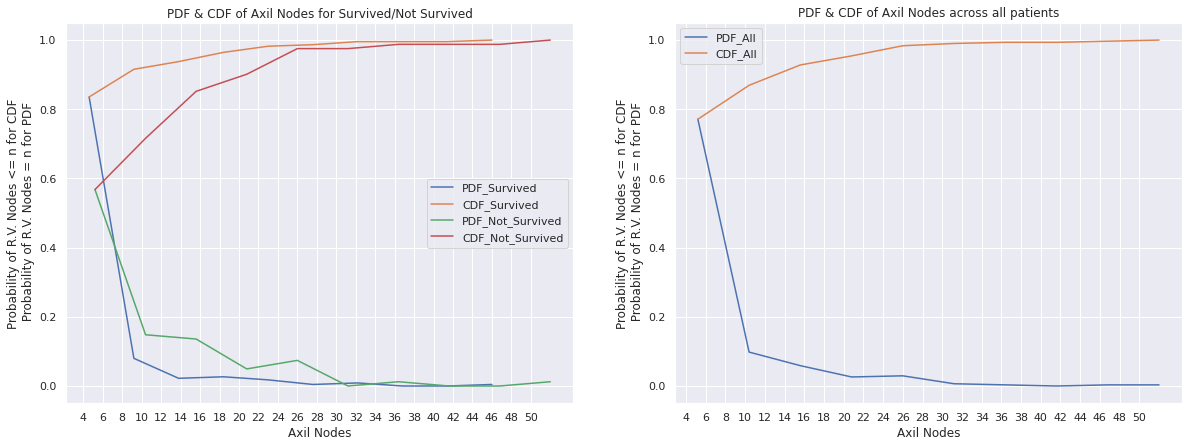

In [38]:
#we plot the pdf_yes, cdf_yes, pdf_no and cdf_no in a single plot
#we plot the pdf_all, cdf_all in another plot
fig, ax = plt.subplots(nrows =1 , ncols =2, figsize=(20,7))

ax[0].set(xlabel = 'Axil Nodes',ylabel='Probability of R.V. Nodes <= n for CDF\n Probability of R.V. Nodes = n for PDF', title = 'PDF & CDF of Axil Nodes for Survived/Not Survived')
ax[0].set_xticks(np.arange(int(bin_edges_yes[0]),int(bin_edges_no[-1]),2))
ax[0].plot(bin_edges_yes[1:], pdf_yes)
ax[0].plot(bin_edges_yes[1:], cdf_yes)
ax[0].plot(bin_edges_no[1:], pdf_no)
ax[0].plot(bin_edges_no[1:], cdf_no)
ax[0].legend(labels=['PDF_Survived','CDF_Survived', 'PDF_Not_Survived', 'CDF_Not_Survived'])

ax[1].set(xlabel = 'Axil Nodes', ylabel = 'Probability of R.V. Nodes <= n for CDF\n Probability of R.V. Nodes = n for PDF',  title = 'PDF & CDF of Axil Nodes across all patients')
ax[1].set_xticks(np.arange(int(bin_edges_all[0]),int(bin_edges_all[-1]),2))
ax[1].plot(bin_edges_all[1:], pdf_all)
ax[1].plot(bin_edges_all[1:], cdf_all)
ax[1].legend(labels=['PDF_All','CDF_All'])

plt.show()

In [39]:
#this cell is used to run queries based on plot observations to compute statistical information
len(df[df['axil_nodes']==0]), len(df[(df['axil_nodes']==0) & (df['survival_status']=='Yes')]), len(df[(df['axil_nodes']==0) & (df['survival_status']=='No')])

(136, 117, 19)

Observations: 
> 91% (=281) of the total patients have nodes less than 15.

> 90.6% (=204) of the total survived patients have nodes less than 9. 

> 90.1% (=73) of the total patients who did not survive have nodes less than 21.

> Patients having 0 nodes have high chances of survival.

> 40%(=136) of total patients have 0 nodes.

> 86%(=117) of those patients with 0 nodes have survived which makes up for 52% of the total survived patients and 38% of the total patients.

**PDF and CDF of Ages**

In [40]:
#calculate the counts and bin edges for age feature of survived and not survived patients using df_yes and df_no dataframes respectively
#pdf_yes, cdf_yes and pdf_no, cdf_no are lists of y-coord points when we plot our PDF and CDF of survived and not survived patients 
counts_yes, bin_edges_yes = np.histogram(df_yes['age'], bins=10, density=False)
pdf_yes = counts_yes/(sum(counts_yes))
cdf_yes = np.cumsum(pdf_yes)

counts_no, bin_edges_no = np.histogram(df_no['age'], bins=10, density=False)
pdf_no = counts_no/(sum(counts_no))
cdf_no = np.cumsum(pdf_no)

#calculate the counts and bin edges for age feature of all patients
#pdf_all and cdf_all are lists of y-coord points when we plot our PDF and CDF 
counts_all, bin_edges_all = np.histogram(df['age'], bins=10, density=False)
pdf_all = counts_all/sum(counts_all)
cdf_all = np.cumsum(pdf_all)

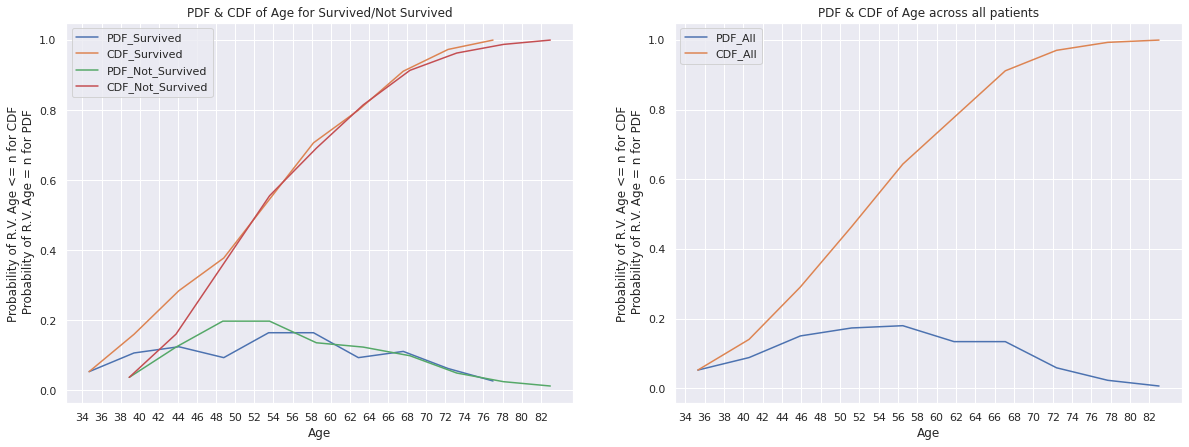

In [41]:
#we plot the pdf_yes, cdf_yes, pdf_no and cdf_no in a single plot
#we plot the pdf_all, cdf_all in another plot
fig, ax = plt.subplots(nrows =1 , ncols =2, figsize=(20,7))

ax[0].set(xlabel = 'Age',ylabel='Probability of R.V. Age <= n for CDF\n Probability of R.V. Age = n for PDF', title = 'PDF & CDF of Age for Survived/Not Survived')
ax[0].set_xticks(np.arange(int(bin_edges_yes[0]),int(bin_edges_no[-1]),2))
ax[0].plot(bin_edges_yes[1:], pdf_yes)
ax[0].plot(bin_edges_yes[1:], cdf_yes)
ax[0].plot(bin_edges_no[1:], pdf_no)
ax[0].plot(bin_edges_no[1:], cdf_no)
ax[0].legend(labels=['PDF_Survived','CDF_Survived', 'PDF_Not_Survived', 'CDF_Not_Survived'])

ax[1].set(xlabel = 'Age', ylabel = 'Probability of R.V. Age <= n for CDF\n Probability of R.V. Age = n for PDF',  title = 'PDF & CDF of Age across all patients')
ax[1].set_xticks(np.arange(int(bin_edges_all[0]),int(bin_edges_all[-1]),2))
ax[1].plot(bin_edges_all[1:], pdf_all)
ax[1].plot(bin_edges_all[1:], cdf_all)
ax[1].legend(labels=['PDF_All','CDF_All'])

plt.show()

In [42]:
#this cell is used to run queries based on plot observations to compute statistical information

len(df[(df['age']<68)]), len(df[(df['age']<68) & (df['survival_status']=='Yes')]), len(df[(df['age']<68) & (df['survival_status']=='No')])

(279, 205, 74)

Observations:
> 91%(=279) of total patients are aged less than 68, which consists of: 

> 91%(=205) of the patients who survived are also aged less than 68.

> 91%(=74) of the patients who did not survive are also aged less than 68.

> The ages of patients from both the classes overlap a lot.

**PDF and CDF of Operation Year**

In [43]:
#calculate the counts and bin edges for operation_Year feature of survived and not survived patients using df_yes and df_no dataframes respectively
#pdf_yes, cdf_yes and pdf_no, cdf_no are lists of y-coord points when we plot our PDF and CDF of survived and not survived patients 
counts_yes, bin_edges_yes = np.histogram(df_yes['operation_Year'], bins=12, density=False)
pdf_yes = counts_yes/(sum(counts_yes))
cdf_yes = np.cumsum(pdf_yes)

counts_no, bin_edges_no = np.histogram(df_no['operation_Year'], bins=12, density=False)
pdf_no = counts_no/(sum(counts_no))
cdf_no = np.cumsum(pdf_no)

#calculate the counts and bin edges for operation_Year feature of all patients
#pdf_all and cdf_all are lists of y-coord points when we plot our PDF and CDF 
counts_all, bin_edges_all = np.histogram(df['operation_Year'], bins=12, density=False)
pdf_all = counts_all/sum(counts_all)
cdf_all = np.cumsum(pdf_all)

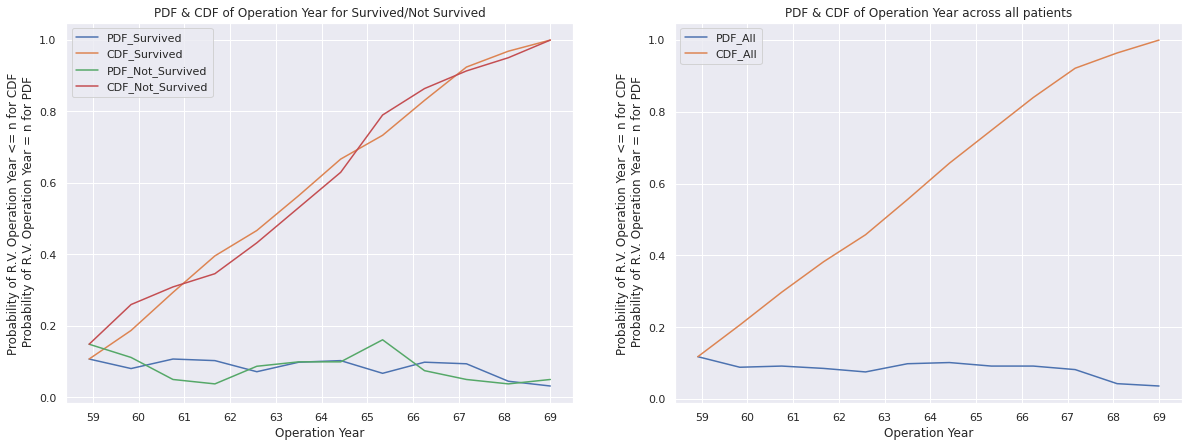

In [44]:
#we plot the pdf_yes, cdf_yes, pdf_no and cdf_no in a single plot
#we plot the pdf_all, cdf_all in another plot
fig, ax = plt.subplots(nrows =1 , ncols =2, figsize=(20,7))

ax[0].set(xlabel = 'Operation Year',ylabel='Probability of R.V. Operation Year <= n for CDF\n Probability of R.V. Operation Year = n for PDF', title = 'PDF & CDF of Operation Year for Survived/Not Survived')
ax[0].set_xticks(np.arange(int(bin_edges_yes[0]),int(bin_edges_no[-1]+1),1))
ax[0].plot(bin_edges_yes[1:], pdf_yes)
ax[0].plot(bin_edges_yes[1:], cdf_yes)
ax[0].plot(bin_edges_no[1:], pdf_no)
ax[0].plot(bin_edges_no[1:], cdf_no)
ax[0].legend(labels=['PDF_Survived','CDF_Survived', 'PDF_Not_Survived', 'CDF_Not_Survived'])

ax[1].set(xlabel = 'Operation Year', ylabel = 'Probability of R.V. Operation Year <= n for CDF\n Probability of R.V. Operation Year = n for PDF',  title = 'PDF & CDF of Operation Year across all patients')
ax[1].set_xticks(np.arange(int(bin_edges_all[0]),int(bin_edges_all[-1]+1),1))
ax[1].plot(bin_edges_all[1:], pdf_all)
ax[1].plot(bin_edges_all[1:], cdf_all)
ax[1].legend(labels=['PDF_All','CDF_All'])

plt.show()

In [45]:
#this cell is used to run queries based on plot observations to compute statistical information
len(df[df['operation_Year']==69]), len(df[df['operation_Year']==58]), len(df[(df['operation_Year']==59) & (df['survival_status']=='Yes')])

(11, 36, 18)

Observations:

> 1958 had the most number of patients(=36) operated on.

> 1969 had the least number of patients(=11) operated on.

> 1965 had the most number of patients(=13) that did not survive. 

> 1958 and 1960 had the most number of patients that survived(=24 each).

**Lets see how our target variable behaves w.r.t predictor variables**

**Age**

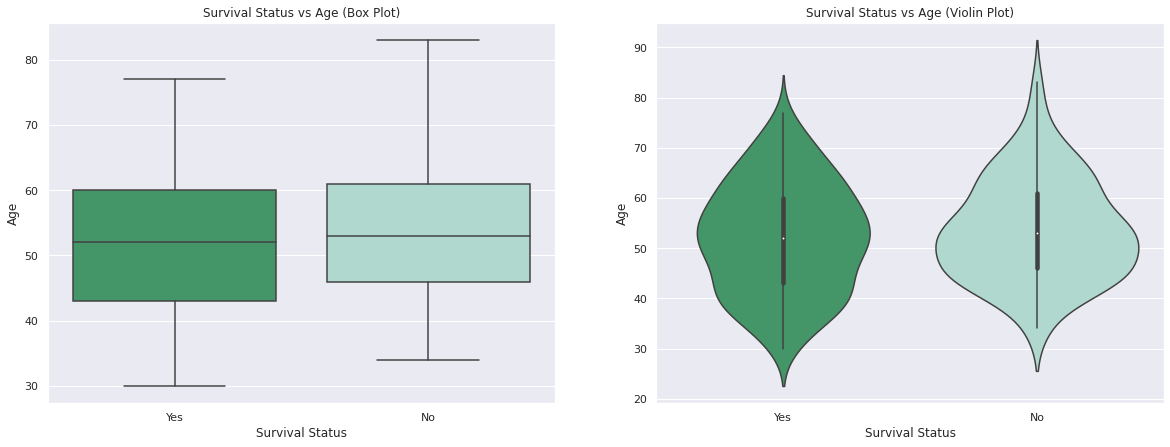

In [46]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

sns.boxplot(data=df, x='survival_status', y='age', palette = 'BuGn_r', ax= ax[0])
ax[0].set(xlabel = "Survival Status", ylabel ="Age",title="Survival Status vs Age (Box Plot)" )

sns.violinplot(data=df, x='survival_status', y='age', palette = 'BuGn_r', ax= ax[1])
ax[1].set(xlabel = "Survival Status", ylabel ="Age",title="Survival Status vs Age (Violin Plot)" )

plt.show()

**Observations:**
> Nothing much notable that we already did not observe from the previous plots.

> Ages of the patients that didn't survive follow a distribution that is slightly skewed to the right, however all the points lie within Q1-(1.5\*IQR) to Q3+(1.5\*IQR) range

> Ages of patients who survived and those who didnt, overlap a lot and therfore Age alone cannot be used to separate the classes

**Axil Nodes**

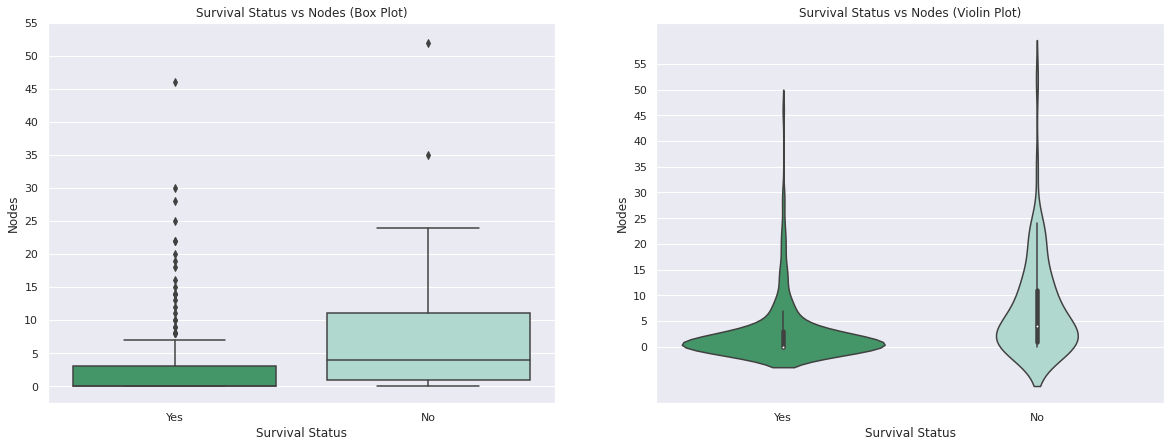

In [47]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

sns.boxplot(data=df, x='survival_status', y='axil_nodes', palette = 'BuGn_r', ax= ax[0])
ax[0].set(xlabel = "Survival Status", ylabel ="Nodes",title="Survival Status vs Nodes (Box Plot)" )
ax[0].set_yticks(np.arange(60, step=5))


sns.violinplot(data=df, x='survival_status', y='axil_nodes', palette = 'BuGn_r', ax= ax[1])
ax[1].set(xlabel = "Survival Status", ylabel ="Nodes",title="Survival Status vs Nodes (Violin Plot)" )
ax[1].set_yticks(np.arange(60, step=5))

plt.show()

In [48]:
#this cell is used to run queries based on plot observations to compute statistical information
len(df[(df['axil_nodes']>8) & (df['survival_status']=='Yes')]), len(df[(df['axil_nodes']>8) & (df['survival_status']=='No')]), len(df[(df['axil_nodes']>8)])

(21, 28, 49)

**Observations:** 

> Patients who survived having nodes more than 8(~Q3+1.5*IQR) are outliers in this class which make up about 9%(=21) of the total survived patients and 6% of the total patients.

> Patients who did not survive having nodes more than 26(=Q3+1.5*IQR) are outliers in this class which make up 2.4%(=2) of the patients who did not survive and 0.6% of the total patients.

> 50% of the patients that survived have 0 nodes and 50% of the patients who did not have less than 5 nodes.

> The patients having more than 8 nodes have a low chance of survival. These patients make up 16%(=49) of the total patients. 57%(=28) of these patients did not survive which is 34% of the total patients that did not survive and 9% of the total patients.


### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


<h4> Let's see how our predictor features behave with respect to each other </h4>

**Pair Plot**

In [49]:
df['operation_Year'] = df['operation_Year'].astype(int)

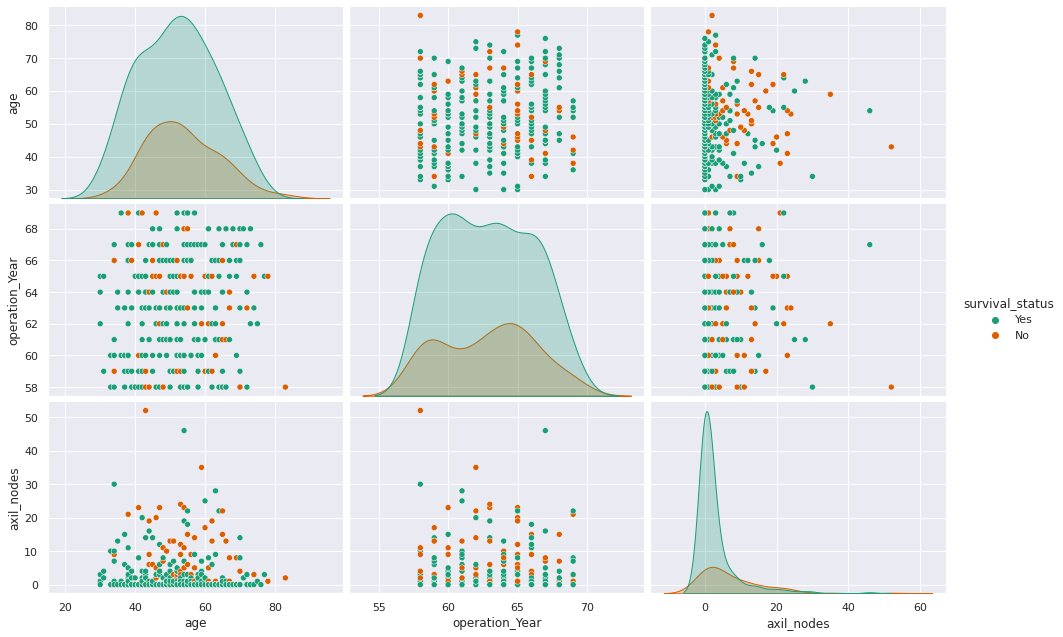

In [50]:
#Using Pair Plot to visualize combinations of the scatter plots together
sns.pairplot(data=df, hue='survival_status', palette = 'Dark2', height = 3, aspect=1.5)
plt.show()

**Observations:**
> Age vs Axil Nodes although have a considerable overlap we take a closer look at it and try to lay down distinguishing conditions.

> Operation Year is better to be used as category variable. To plot Operation Year against rest of the features we use boxplots as they can represent the relation between continuous and categorical variables properly. 

In [51]:
df = df.astype({'operation_Year':'category'})

**Age and Axil Nodes**

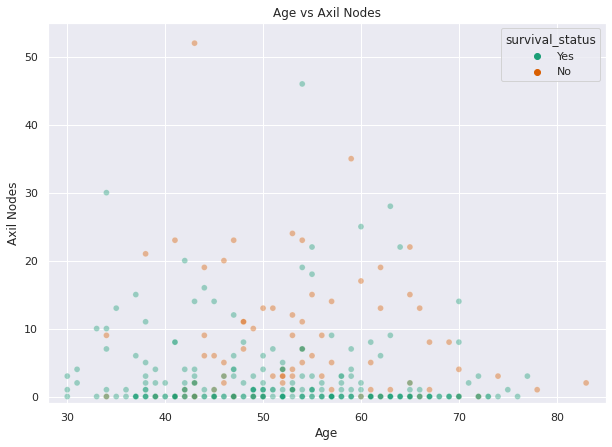

In [52]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10,7))

sns.scatterplot(data=df, x='age', y='axil_nodes', hue='survival_status', palette = 'Dark2', legend=True, ax= ax, alpha=0.4 )
plt.xlabel("Age")
plt.ylabel("Axil Nodes")
plt.title("Age vs Axil Nodes" )
plt.xlim([28,85])
plt.ylim([-1,55])
plt.show()

Observations: 
> There's considerable amount of overlap in almost every region of the plot therefore its difficult to establish a robust condition to distinguish but nonetheless its a considerable plot for laying down a couple of high accuracy conditions.

> Looking at few of those conditions below from what we observe from the plot: 

In [53]:
df_ = df.loc[df['axil_nodes'] < 2]
values = df_['survival_status'].value_counts()
print(values)
print((values[0]*100)//sum(values))

Yes    150
No      27
Name: survival_status, dtype: int64
84


In [54]:
df_ = df.loc[df['axil_nodes'] == 0]
values = df_['survival_status'].value_counts()
print(values)
print((values[0]*100)//sum(values))

Yes    117
No      19
Name: survival_status, dtype: int64
86


In [55]:
df_ = df.loc[(df['age']<=40) & (df['axil_nodes'] < 10)]
values = df_['survival_status'].value_counts()
print(values)
print((values[0]*100)//sum(values))

Yes    33
No      3
Name: survival_status, dtype: int64
91


In [56]:
df_ = df.loc[(df['age']>40) & (df['axil_nodes'] >10)]
values = df_['survival_status'].value_counts()
print(values)
print((values[0]*100)//sum(values))

No     22
Yes    13
Name: survival_status, dtype: int64
62




*   Patients between ages 30-40 with nodes < 10 have high survival chance of 90%
*   Patients with age >40 with nodes >10 have low survival chance of 38% (100-62)
*   Patients with nodes < 2 have a very high survival chance of 84%
*   Patients with nodes = 0 have a 86% chance of survival. 
*   However we dont see any uniform relation between age and axil_nodes (uniform relation for e.g. if age is more then nodes are higher or lower)





**Since our Bivariate Analysis below includes Operation Year which is a categorical feature and rest of the features (i.e. Age and Axil Nodes) are continuous we will use boxplot to visualise.**

**Operation Year and Age**

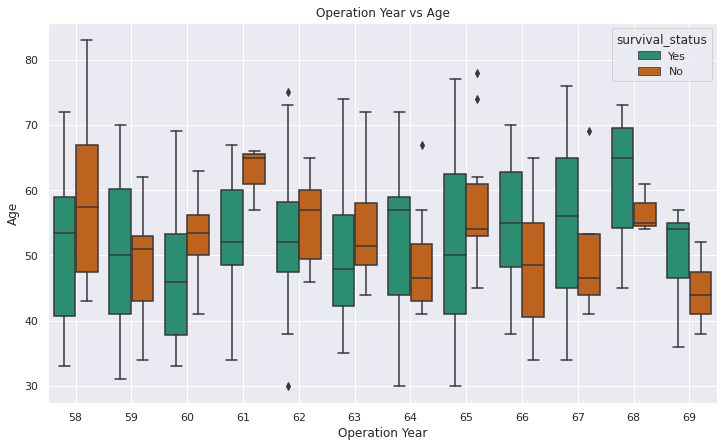

In [57]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(12,7))

sns.boxplot(data=df, x='operation_Year', y='age', hue='survival_status', palette = 'Dark2', ax= ax)
ax.set(xlabel = 'Operation Year',ylabel ='Age', title = 'Operation Year vs Age')
ax.grid(True)

plt.show()

In [58]:
#this cell is used to run queries based on plot observations to compute statistical information
df_ = df.loc[(df['operation_Year']==67) & (df['age']>50)]
values = df_['survival_status'].value_counts()
print(values)
print((values[0]*100)//sum(values))

Yes    13
No      1
Name: survival_status, dtype: int64
92


**Observations:**

> Patients operated in year 1967 having age more than 50 make up for 4% of the total patients, these have a high chance of survival - 92%.  

> Patients operated in year 1961 having age less than 60 make up for 5% of the total patients, have a high chance of survival - 94%

> Patients operated in year 1960 having age less than 50 make up for 5% of the total patients, have a high chance of survival - 93%

> Rest of the years show a lot of overlap and hence can't be used effectively to separate the classes.

**Operation Year and Axil Nodes**

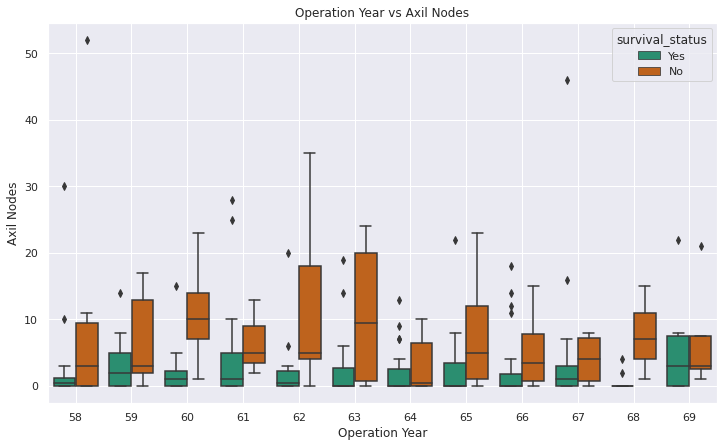

In [59]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(12,7))

sns.boxplot(data=df, x='operation_Year', y='axil_nodes', hue='survival_status', palette = 'Dark2', ax= ax)
ax.set(xlabel = 'Operation Year',ylabel ='Axil Nodes', title = 'Operation Year vs Axil Nodes')
ax.grid(True)

plt.show()

In [60]:
#this cell is used to run queries based on plot observations to compute statistical information
df_ = df.loc[(df['axil_nodes']>10)]
values = df_['survival_status'].value_counts()
print(values)
print((values[0]*100)//sum(values))

df_ = df.loc[(df['operation_Year']==58) & (df['axil_nodes']>3)]
values = df_['survival_status'].value_counts()
print(values)
print((values[0]*100)//sum(values))

No     23
Yes    17
Name: survival_status, dtype: int64
57
No     6
Yes    2
Name: survival_status, dtype: int64
75


**Observations:**

> Patients operated in year 1958 having nodes more than 3 make up for 2.6% of the total patients, these have a low chance of survival - 25%.  

> Patients operated in year 1962 having nodes more than 2 make up for 3.2% of the total patients, have a low chance of survival - 40%

> In general, patients having nodes more than 10 make up for 13% of the total patients, have a low chance of survival - 43%

Make contour plot of age and axil nodes of survived and died patients separately to know which region has high density of which points and define conditions based on that

**Contour Plot**

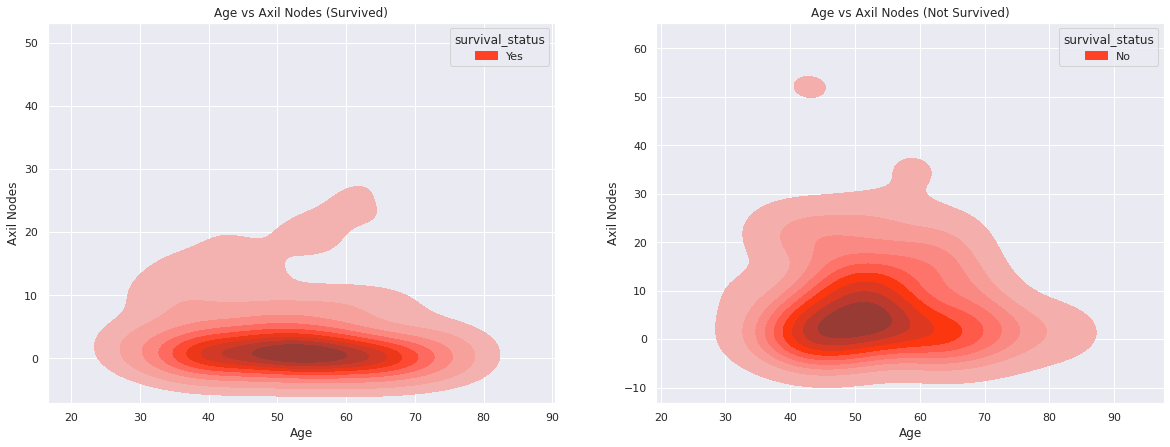

In [61]:
#Age vs Axil Nodes
sns.set_style('darkgrid')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

sns.kdeplot(data=df_yes, x = 'age', y = 'axil_nodes', fill=True,palette='CMRmap', hue='survival_status',ax=ax[0])
ax[0].set(xlabel = 'Age',ylabel = 'Axil Nodes', title = 'Age vs Axil Nodes (Survived)')

sns.kdeplot(data=df_no, x = 'age', y = 'axil_nodes', fill=True, palette='CMRmap', hue='survival_status',ax=ax[1])
ax[1].set(xlabel = 'Age',ylabel ='Axil Nodes', title = 'Age vs Axil Nodes (Not Survived)')

plt.show()

In [62]:
#this cell is used to run queries based on plot observations to compute statistical information
df_ = df.loc[(df['axil_nodes']>6)&(df['axil_nodes']<30) &(df['age'] > 39) & (df['age'] < 70)]
values = df_['survival_status'].value_counts()
print(values)
print((values[0]*100)//sum(values))

No     28
Yes    21
Name: survival_status, dtype: int64
57


**Observations:**

> Patients between Ages 45-70 and nodes less than 3 make up for 40% of the total patients, have higher chances at survival - 86%

> Patients between Ages 39-70 and Nodes between 6 to 30 make up for 16% of the total patients, have lower chances at survival - 43%

Note: We can combine this information with operation years with higher/lower survival chances to get more better results out of this

**Let's look at age vs axil nodes data for each year to see if we can establish 
any distinguishing conditions.**

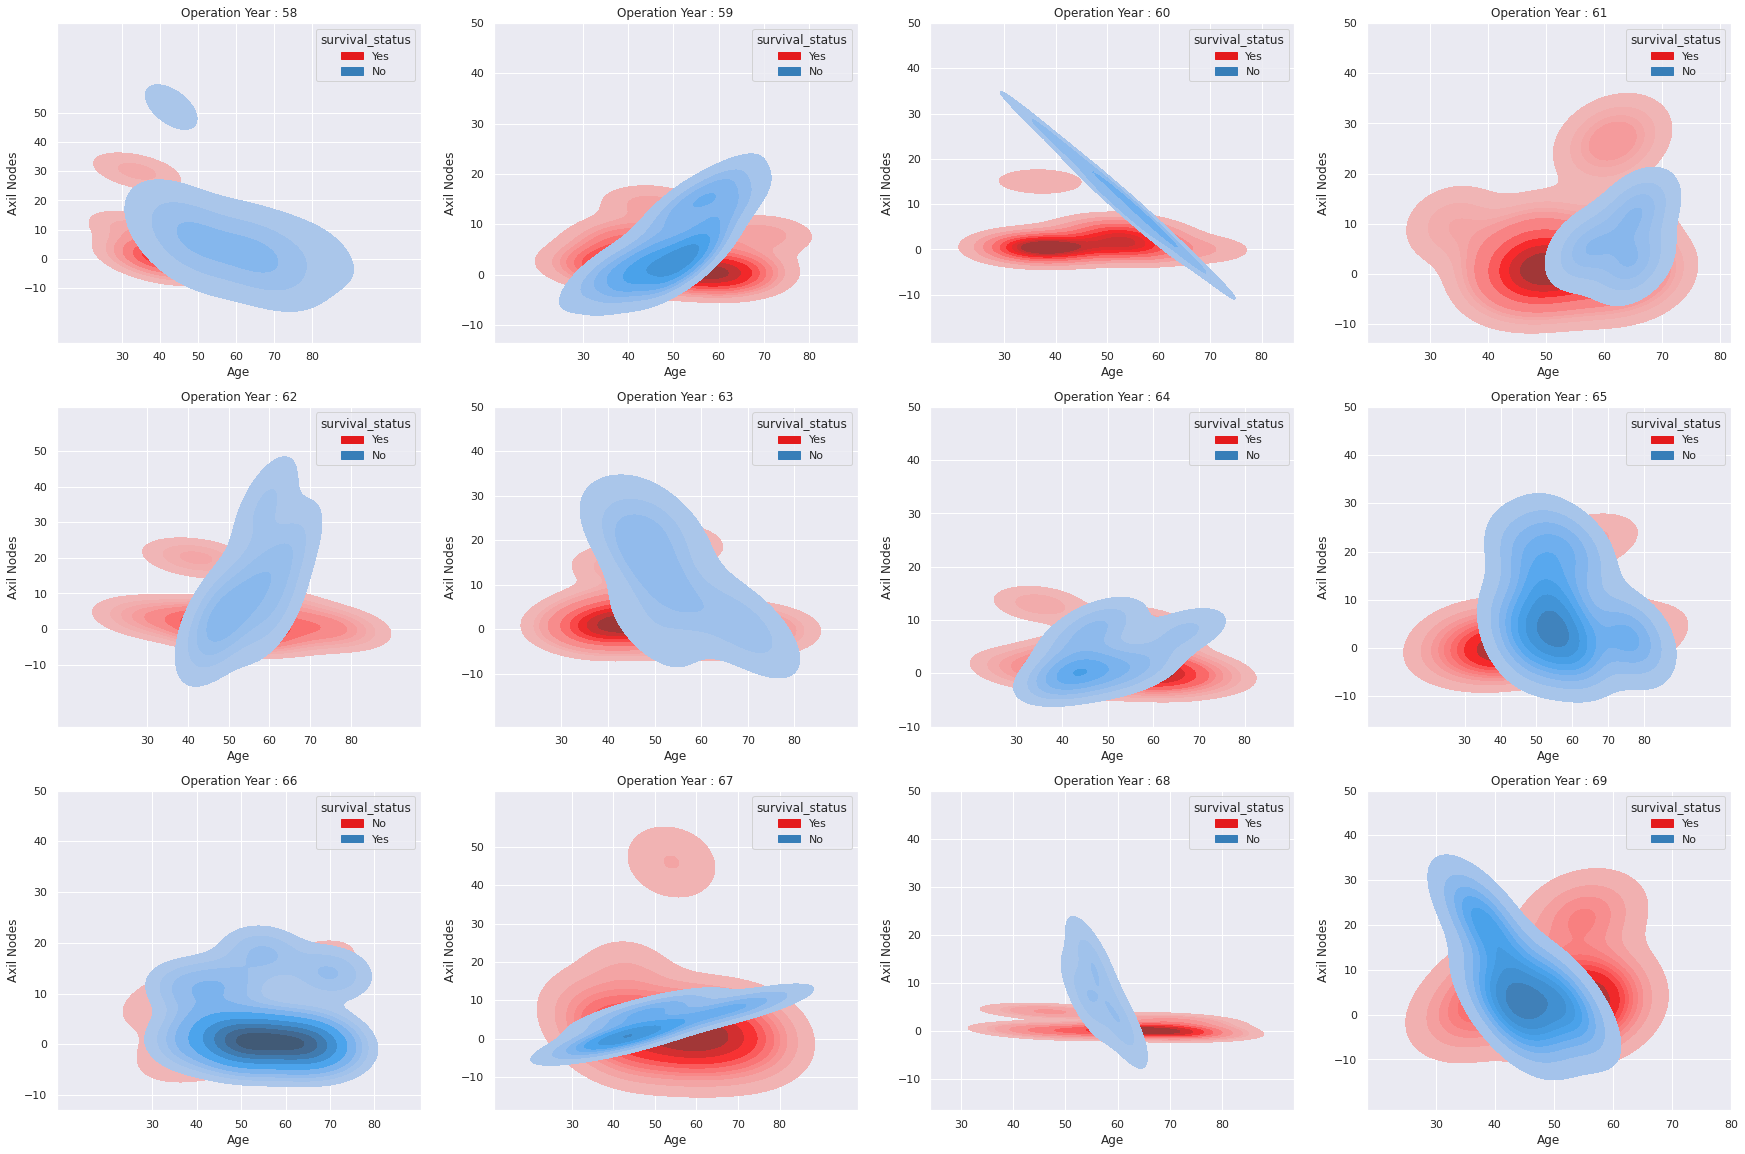

In [63]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(nrows = 3, ncols= 4, figsize=(30,20))

def plot_contours(df, ax):
    count = 58 #start year
    for i in range(3):
        for j in range(4):
            sns.kdeplot(data=df.query(f'operation_Year == {count}'), x = 'age', y = 'axil_nodes', fill=True, palette='Set1', hue='survival_status', ax=ax[i,j])
            ax[i,j].set_xticks(np.arange(30,90,10))
            ax[i,j].set_yticks(np.arange(-10,60,10))
            ax[i,j].set(xlabel='Age', ylabel='Axil Nodes', title=f'Operation Year : {count}')
            if count < 70:
                count += 1

plot_contours(df, ax)

**Observations:**

> Years 60, 61, 63, 67, and 68 depict some scope for separation of classes.

**Let's have a closer look at one of the plots**

Below are 2 contour plots for: survived(left) and didn't survive(right) that visualise age vs axil_nodes with hue as an operation_Year which has **high** survival ratio (which we obtain from the univariate analysis we did above).
We use operation_Year = 1960 for the below task, you can use other years with high survival ratio.

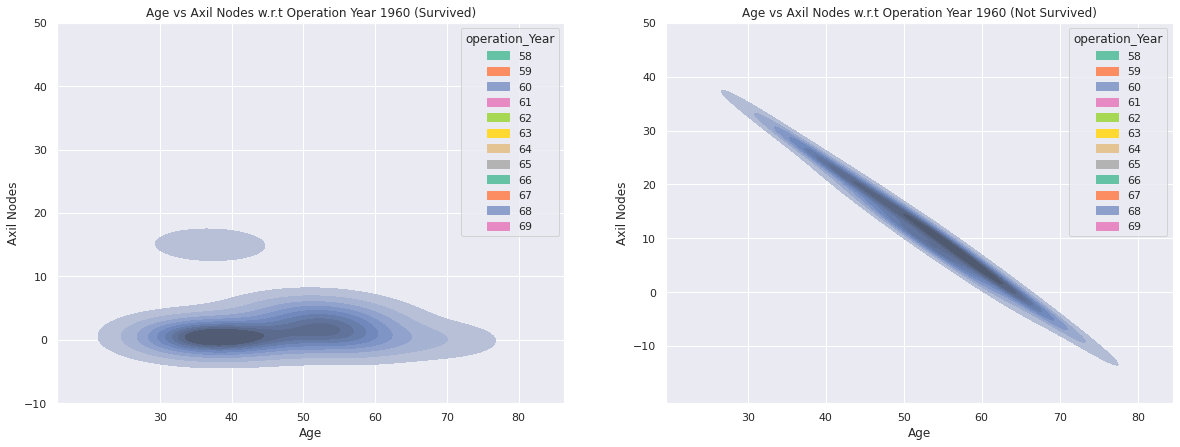

In [64]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

sns.kdeplot(data=df_yes.query('operation_Year in [60]'), x = 'age', y = 'axil_nodes', fill=True, palette='Set2', hue='operation_Year',ax=ax[0])
ax[0].set_xticks(np.arange(30,90,10))
ax[0].set_yticks(np.arange(-10,60,10))
ax[0].set(xlabel = 'Age',ylabel = 'Axil Nodes', title = 'Age vs Axil Nodes w.r.t Operation Year 1960 (Survived)')

sns.kdeplot(data=df_no.query('operation_Year in [60]'), x = 'age', y = 'axil_nodes', fill=True, palette='Set2', hue='operation_Year',ax=ax[1])
ax[1].set_xticks(np.arange(30,90,10))
ax[1].set_yticks(np.arange(-10,60,10))
ax[1].set(xlabel = 'Age',ylabel = 'Axil Nodes', title = 'Age vs Axil Nodes w.r.t Operation Year 1960 (Not Survived)')

plt.show()

In [65]:
#this cell is used to run queries based on plot observations to compute statistical information
df_ = df.loc[(df['operation_Year']==60) & (df['axil_nodes']>=8) &  (df['age'] < 85)]
values = df_['survival_status'].value_counts()
print(values)
print((values[0]*100)//sum(values))

No     3
Yes    1
Name: survival_status, dtype: int64
75


Observations: 

> Ages < 60, Nodes <=4, Year=1960 makes up for 6.8%(=21) of total patients, depicts a high survival chance - 100%

> Ages < 80, Nodes > 8, Year=1960 makes up for 1.3%(=4) of total patients, depicts a low survival chance - 25%

Note: the year we used here already has a high survival ratio

## Querying the dataframe to get accuracy corresponding to the univariate, bivariate and multivariate observations

**Below are the ranges we obtained from our analysis where survived/died ratio was the most and the least:**

Univariate: 

HS - High Survival

LS - Low Survival

*   HS_ages = [30,35], [35,41], [56,62], [72,78] (accuracy ~80% using all ranges together)
*   LS_ages = [41,46], [46,51], [51,56], [62,67] (accuracy ~69% using all ranges together)

*   HS_nodes = [0,8] (accuracy ~80% using all ranges together)
*   LS_nodes = [8,52] (accuracy ~43% using all ranges together)


*   HS_op_year = 60, 61, 66, 67 (accuracy ~84% using all yaers together)
*   LS_op_year = 58, 59, 65, 69 (accuracy ~62% using all yaers together)


Bivariate:

*   HS_op_year_nodes = 60 & <5 (accuracy ~95%) 
*   LS_op_year_nodes = 60 & >=5 (accuracy ~40%)

*   HS_op_year_nodes = 68 & =0 (accuracy 100%) 
*   LS_op_year_nodes = 68 & >0 (accuracy 40%) 

*   HS_op_year_age = 61 & <60 (accuracy ~94%)
*   LS_op_year_age = 61 & >=62 (accuracy ~71%)

Multivariate: 

*   HS_all_features = 60 & <=4 & <46 (accuracy 100%)
*   HS_all_features = 67 & <=4 & >45 (accuracy 100%)
*   HS_all_features = 61 & <=10 & <50 (accuracy 100%)
*   HS_all_features = 63 & <=10 & <55 (accuracy ~93%)
*   HS_all_features = 68 & <=4 & >50 (accuracy ~88%)

(We can obtain a few more conditions from our multivariate analysis)






We calculate the accuracies using the above conditions and mention right next to the specific condition.

In [66]:
#this cell is used to run queries based on plot observations all our analysis to compute statistical information
query = df[ ((df['age']>29) & (df['age']<=41)) | ((df['age']>56) & (df['age']<=62)) | ((df['age']>72) & (df['age']<=78))]
value = query['survival_status'].value_counts()
print(value)
print(value[0]/(value[0]+value[1]))


query = df[((df['age']>41) & (df['age']<=56)) | ((df['age']>62) & (df['age']<=67))]
value = query['survival_status'].value_counts()
print(value)
print(value[0]/(value[0]+value[1]))

Yes    88
No     21
Name: survival_status, dtype: int64
0.8073394495412844
Yes    123
No      55
Name: survival_status, dtype: int64
0.6910112359550562


### 1.5 Summarize your final conclusions of the Exploration
- You can desrcibe the key features that are important for the Classification task.
- Try to quantify your results i.e. while writing observations include numbers,percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points
- Write your observations in english as crisply and unambigously as possible.

Overall Conclusion: 

> From High Level Stats: 
* Dataset is imbalanced with more patients belonging to the survived class. Since the dataset is small, oversampling would the best option to balance the class distribution. Refer for oversampling techniques- https://towardsdatascience.com/7-over-sampling-techniques-to-handle-imbalanced-data-ec51c8db349f
*   Age and Axil nodes have a weak negative correlation.
* Axil Nodes Feature right skewed indicating outliers in that direction. After using Quantile Outlier Detection method we found 40 outliers. Since the dataset is small, replacing the outlier values would be the best option. Refer for dealing with outliers - https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/

> From Distribution Plots:
*   The feature which effectively classifies majority of points with good accuracy is Axil Nodes. Patients having Axil Nodes <=4 make up 75% of the total patients. These patients have a 81.7% chance of survival.
*   The next best feature which classifies a considerable number of points with good accuracy is Operation Year. Patients who were operated in years 1960,1961,1966 and 1967 make up 35% of the total patients. These patients have a 84% chance of survival.

> From PDF and CDF:
* 40% of total patients have 0 nodes. 86%(=117) of those patients with 0 nodes have survived which makes up for 52% of the total survived patients and 38% of the total patients.

> From Pair Plots, Scatter Plots, Box Plots and Contour Plots (Bivariate):
* Patients with Axil Nodes<=9 and 30<=Ages<=40 make up 11.7% of the total patients. Patients belonging to this region have 90% chance of survival.
* Patients with Axil Nodes>=10 and Ages>40 make up 11.47% of the total patients. Patients belonging to this region have 38% very low chance of survival.
* Patients between Ages 45-70 and nodes less than 3 make up for 40% of the total patients, have higher chances at survival - 86%
* Patients between Ages 39-70 and Nodes between 6 to 30 make up for 16% of the total patients, have lower chances at survival - 43%

> From Contour Plots (Multivariate):
* Years 60, 61, 63, 67, and 68 depict some scope for separation of classes with high accuracy but these regions would be consisting of very less percentage of points.

> Concluding Statement: The crux of the analysis is to discover high density regions(with large number of points) of data in n-dim space (n represents number of features, n<=3) where one of the classes dominates the other by a great margin. After doing our analysis we discovered a great number of regions where one class dominates the other by a great margin but many of these regions were low in density. A general rule which meets all our conditions is derived from nodes feature: Patients having Axil Nodes <=4 make up 75% of the total patients. These patients have a 81.7% chance of survival.

In [67]:
#Generic conditions: 

def survives_or_not(nodes): #only using nodes
  patient = 0 #flag
  if (nodes <= 4):
        patient = 1 #High Survival chances (81.7%)

  if (nodes in range(5,9)):
        patient = 0 #Considerable chance of survival (59%)

  if (nodes >= 9 ):
        patient = -1 #Low Survival Chances (43%) 

  if patient == 1: 
        print('High chance of Survival')
  elif patient == 0:
        print('Considerable chance of Survival')
  else: 
        print('Low chance of Survival')

In [92]:
#this cell is used to run queries to set the above generic conditions
print(len(df[(df['axil_nodes']>=5) & (df['axil_nodes']<9)]), len(df_yes[(df_yes['axil_nodes']>=5) & (df_yes['axil_nodes']<9)]), len(df_no[(df_no['axil_nodes']>=5) & (df_no['axil_nodes']<9)]))
print(len(df[(df['axil_nodes']>=9)]), len(df_yes[(df_yes['axil_nodes']>=9)]), len(df_no[(df_no['axil_nodes']>=9)]))

27 16 11
49 21 28
